In [1]:
from spectral_cube import SpectralCube
from pvextractor import extract_pv_slice, Path
import pylab as pl
import numpy as np
from astropy.visualization import quantity_support
from astropy import units as u
from astropy import wcs
from matplotlib.colors import LogNorm
from astropy.visualization.stretch import SinhStretch
from astropy.visualization import simple_norm
import matplotlib.pyplot as plt
from astropy.utils import data
import regions
from astropy.io import fits


fatal: detected dubious ownership in repository at '/blue/adamginsburg/adamginsburg/repos/dask'
To add an exception for this directory, call:

	git config --global --add safe.directory /blue/adamginsburg/adamginsburg/repos/dask


In [2]:
#mom0_17 = SpectralCube.read('/orange/adamginsburg/cmz/g5/G5/sum/spw17_12CO/g5.mom0.smK.tot.12CO.spw17.im', format='casa_image')
#mom0_21 = SpectralCube.read('/orange/adamginsburg/cmz/g5/G5/sum/spw21_CH3OH/g5.mom0.smK.tot.CH3OH.spw21.im', format='casa_image')
#mom0_23 = SpectralCube.read('/orange/adamginsburg/cmz/g5/G5/sum/spw23_H2CO/g5.mom0.smK.tot.H2CO.spw23.im', format='casa_image')
#mom0_25 = SpectralCube.read('/orange/adamginsburg/cmz/g5/G5/sum/spw25_H2CO/g5.mom0.smK.tot.H2CO.spw25.im/', format='casa_image')
#mom0_27 = SpectralCube.read('/orange/adamginsburg/cmz/g5/G5/sum/spw27_SiO/g5.mom0.smK.tot.SiO.spw27.im', format='casa_image')
#mom0_29 = SpectralCube.read('/orange/adamginsburg/cmz/g5/G5/sum/spw29_13CO/g5.mom0.smK.tot.13CO.spw29.im', format='casa_image')
#mom0_31 = SpectralCube.read('/orange/adamginsburg/cmz/g5/G5/sum/spw31_C18O/g5.mom0.smK.tot.C18O.spw31.im', format='casa_image')

In [3]:
combo_fixednames = [
    '/orange/adamginsburg/cmz/g5/G5/sum/newcombination/galcorrected/g5.12CO.spw17.fits',
    'lol',
    '/orange/adamginsburg/cmz/g5/G5/sum/newcombination/galcorrected/g5.CH3OH.spw21.fits',
    '/orange/adamginsburg/cmz/g5/G5/sum/newcombination/galcorrected/g5.H2CO.spw23.fits',
    '/orange/adamginsburg/cmz/g5/G5/sum/newcombination/galcorrected/g5.H2CO.spw25.fits',
    '/orange/adamginsburg/cmz/g5/G5/sum/newcombination/galcorrected/g5.SiO.spw27.fits',
    '/orange/adamginsburg/cmz/g5/G5/sum/newcombination/galcorrected/g5.13CO.spw29.fits',
    '/orange/adamginsburg/cmz/g5/G5/sum/newcombination/galcorrected/g5.C18O.spw31.fits'
    ]

cube17 = SpectralCube.read(combo_fixednames[0]).with_spectral_unit(u.km/u.s, velocity_convention='radio')
#cube21 = SpectralCube.read(combo_fixednames[2]).with_spectral_unit(u.km/u.s, velocity_convention='radio')
#cube23 = SpectralCube.read(combo_fixednames[3]).with_spectral_unit(u.km/u.s, velocity_convention='radio')
#cube25 = SpectralCube.read(combo_fixednames[4]).with_spectral_unit(u.km/u.s, velocity_convention='radio')
#cube27 = SpectralCube.read(combo_fixednames[5]).with_spectral_unit(u.km/u.s, velocity_convention='radio')
#cube29 = SpectralCube.read(combo_fixednames[6]).with_spectral_unit(u.km/u.s, velocity_convention='radio')
#cube31 = SpectralCube.read(combo_fixednames[7]).with_spectral_unit(u.km/u.s, velocity_convention='radio')

mom0_17 = cube17.with_mask(cube17>0.05*u.K).spectral_slab(0*u.km/u.second, 225*u.km/u.second).moment0()
#mom0_21 = cube21.spectral_slab(0*u.km/u.second, 200*u.km/u.second).moment0()
#mom0_23 = cube23.spectral_slab(0*u.km/u.second, 200*u.km/u.second).moment0()
#mom0_25 = cube25.spectral_slab(0*u.km/u.second, 200*u.km/u.second).moment0()
#mom0_27 = cube27.spectral_slab(0*u.km/u.second, 200*u.km/u.second).moment0()
#mom0_29 = cube29.spectral_slab(0*u.km/u.second, 200*u.km/u.second).moment0()
#mom0_31 = cube31.spectral_slab(0*u.km/u.second, 200*u.km/u.second).moment0()
    

In [4]:
mom0_21

NameError: name 'mom0_21' is not defined

In [ ]:
#plt.imshow(mom0_27[0].value)
ax = pl.subplot(111, projection=mom0_27.wcs.celestial)
ax.imshow(mom0_27[0].value)


In [ ]:
ax = pl.subplot(111, projection=mom0_25.wcs.celestial)
ax.imshow(mom0_25[0].value)

In [ ]:
cocube = mom0_27[0].value/mom0_25[0].value

In [5]:
from astropy import units as u

#27 pc**3 * 10**5 = mass in solar masses

volume = 27 * u.parsec**3
n_dense = 10**5 * u.cm**(-3)
mu = 2 * u.Da

mass = volume * n_dense * mu 
print(mass.to('M_sun'))
# ~ 10^5 M_sun
# pretty big 

132491.67255397653 solMass


In [6]:
ax = pl.subplot(111, projection=mom0_27.wcs.celestial)
ax.imshow(cocube, vmin=0, vmax=2)

cocube.mean()

NameError: name 'mom0_27' is not defined

$X = 2.3 \pm 3 \times 10^{20} {cm^{-2}(Kkms^{-1})^{-1}}$

In [7]:
# cut out below 10 km/s

#cube_17 = SpectralCube.read('/orange/adamginsburg/cmz/g5/G5/sum/spw17_12CO/g5.12CO.spw17.im', format='casa_image').with_spectral_unit(u.km/u.s, velocity_convention='radio').to(u.K)


In [8]:
# immoments(imagename='spw17_12CO/g5.12CO.spw17.im', moments=[0],
# chans='256~1253', outfile='spw17_12CO/g5.mom0.mtot.12CO.spw17.im',includepix=[1.0,1000.0])
#cut_cube = cube_17[256:1253, :, :]
#old_mom0_17 = cut_cube.with_mask((cut_cube > 1.*cut_cube.unit) & (cut_cube < 1000.*cut_cube.unit)).moment0()

In [9]:
slab = cube17.with_mask(cube17>0.05*u.K).spectral_slab(15*u.km/u.s, 225*u.km/u.s)

In [10]:
new_mom0_17 = slab.moment0()

In [11]:
col_density = new_mom0_17 * 2.3*10**20 * u.cm**(-2) * (u.K * u.km / u.s)**(-1) * 0.8

# correction factor (due to He) Kauffmann 2008 
# appendix refer to factor to go from number density of H2 to mass is 2.8 per H2
# mean mass per free particle is 2.3 per free particle 
# review on X-factor (bellato?) converting from 2-1 to 1-0
# Ash Barnes and Mattia Sormani -> mass inflow rates along bar to corroborate mass estimate 
    # determination of mass section

In [12]:
pix_area = new_mom0_17.wcs.celestial.proj_plane_pixel_area()

In [13]:
d = 7 * u.kpc

In [14]:
pix_area_cm = (pix_area * d**2).to(u.parsec**2, equivalencies=u.dimensionless_angles()).to(u.cm**2)

In [15]:
mass_conv = 2.8 * u.Da

In [16]:
mass_map = (col_density * pix_area_cm * mass_conv).to(u.M_sun)

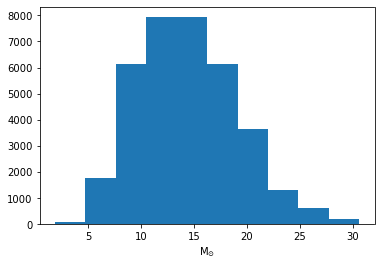

In [17]:
with quantity_support():
    #np.isfinite(mass_map)
    masked = mass_map[np.isfinite(mass_map)]
    plt.hist(masked)
    #plt.savefig('plots/masshist.pdf')
    
# mass per pixel 30-40 solar masses
# total mass ~ 100,000

In [18]:
np.nansum(mass_map)

<Projection 513873.83622923 solMass>

In [19]:
#cube_17.wcs.wcs.restfrq

In [20]:
#raw = SpectralCube.read('/orange/adamginsburg/cmz/g5/G5/sum/spw17_12CO/g5.mom0.tot.12CO.spw17.im', format='casa_image')
#smooth = SpectralCube.read('/orange/adamginsburg/cmz/g5/G5/sum/spw17_12CO/g5.mom0.sm.tot.12CO.spw17.im', format='casa_image')


In [21]:
#print(raw.sum())
#print(smooth.sum()/raw.sum())

In [22]:
#cube_17 = SpectralCube.read('/orange/adamginsburg/cmz/g5/G5/sum/spw17_12CO/g5.12CO.spw17.im', format='casa_image').with_spectral_unit(u.km/u.s, velocity_convention='radio').to(u.K)

In [23]:
#cube_17.write('g5.12CO.spw17.fits', format='fits')  


In [24]:
pwd

'/orange/adamginsburg/cmz/g5/code/clouds-g5-b1'

In [25]:
#reg = regions.Regions.read('/orange/adamginsburg/cmz/g5/code/bigreg.reg')
reg = regions.Regions.read('/orange/adamginsburg/cmz/g5/code/g5-field2.reg')
#reg = regions.Regions.read('/orange/adamginsburg/cmz/g5/code/g5-el.reg')
r0 = reg[0]

In [26]:
ppmap = '/orange/adamginsburg/galactic_plane_surveys/higal/PPMAP_Results/l004_results/l004_cdens.fits'

In [27]:
hdul = fits.open(ppmap)
ww = wcs.WCS(hdul[0].header)
preg = r0.to_pixel(ww)
mask = preg.to_mask()
cutout = mask.cutout(hdul[0].data)
#pixelarea = 1*u.pixel
cden = (mask.multiply(hdul[0].data) * (10**20) * u.cm**(-2))
        #* u.Unit(hdul[0].header['BUNIT']))


In [28]:
u.Unit(hdul[0].header['BUNIT'])

Unit("1e+20 / cm2")

In [29]:
cden[5,5]

<Quantity 7.19433746e+21 1 / cm2>

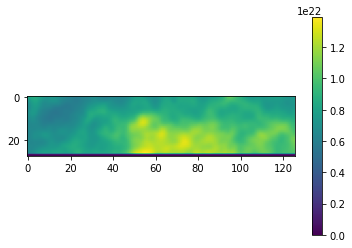

In [30]:
plt.imshow(cden)
plt.colorbar()

In [31]:
cden*u.Da

<Quantity [[8.07581711e+21, 8.29614716e+21, 8.49939423e+21, ...,
            7.25867004e+21, 7.23979492e+21, 7.37451172e+21],
           [7.56119080e+21, 7.90644379e+21, 8.21693497e+21, ...,
            7.27379837e+21, 7.28456802e+21, 7.40584106e+21],
           [7.05975800e+21, 7.49157181e+21, 7.88849030e+21, ...,
            7.19614105e+21, 7.29763565e+21, 7.42395020e+21],
           ...,
           [6.48499603e+21, 6.55174637e+21, 6.68295670e+21, ...,
            9.99367447e+21, 1.01111855e+22, 1.01654076e+22],
           [6.48546677e+21, 6.57390137e+21, 6.74343338e+21, ...,
            9.92062454e+21, 1.00204597e+22, 1.00151138e+22],
           [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
            0.00000000e+00, 0.00000000e+00, 0.00000000e+00]] u / cm2>

In [32]:
preg

<RectanglePixelRegion(center=PixCoord(x=146.7095264995031, y=499.41913751619904), width=125.51378773229975, height=26.85120716004675, angle=0.002418420779051189 deg)>

In [33]:
pix_area_2 = wcs.WCS(hdul[0].header).celestial.proj_plane_pixel_area()

In [34]:
pix_area_cm_2 = (pix_area_2 * d**2).to(u.parsec**2, equivalencies=u.dimensionless_angles()).to(u.cm**2)

In [35]:
pix_area_cm_2

<Quantity 3.9493271e+35 cm2>

In [36]:
pix_area_2

<Quantity 2.778889e-06 deg2>

In [37]:
(pix_area_cm_2 * cden*u.Da*2.8).to(u.M_sun).sum()

<Quantity 28276.25379947 solMass>

In [38]:
cden.mean()

<Quantity 8.67898566e+21 1 / cm2>

In [39]:
np.nanmean(new_mom0_17)

<Projection 387.09762129 K km / s>

In [40]:
cden.mean()/(np.nanmean(new_mom0_17)*0.8)

<Projection 2.80258299e+19 s / (cm2 K km)>

In [41]:
2.7 * u.Msun / u.year * cden.mean()/(np.nanmean(new_mom0_17)*0.8) / (2.3*10**20 * u.cm**(-2) * (u.K * u.km / u.s)**(-1))

<Projection 0.32899887 solMass / yr>